# Les reseaux de neurones
## I- Objectif

1.  Comprendre la structure d'un reseau de neurone
2.  Comprendre la mésure de selection d'attributs:
3.  Créer et entrainer un perceptron multicouche en utilisant Scikit-learn
4.  Utilisation des differentes metriques pour l'évaluation d'un modèle

## II- Introduction
Le perceptron multicouche est parmi les structures de réseaux de neurones les plus utilisés en classification. Ces structure ont été utilisé dans une multitude d’applications dans divers domaines. Il été aussi démontrer que ce type de réseaux de neurones est un approximateur universels grâce à leurs habilité d’approximer n’importe quelle fonction de n’importe quelle dimension et d’une précision arbitraire à condition de leurs présenter taux de données d’entrainement suffisant et adéquat et un bon choix de leurs structure.


### 1- Le modèle d'un neurone

Un model d’un neurone artificiel est montré dans la Figure ci dessous. Il se compose essentiellement d’un ensemble d’entrées $ x_{i} $ muni d’un poids $ w_{1i} $ pour chacune, une unité de calcule représentantle corps du neurone et une seul sortie. 
![image.png](attachment:image.png)
La taille du vecteur d’entré est souvent augmenté en ajoutant une autre entrée $ x_{0}= -1 $ de poids b. Cette entrée supplémentaire s’appel un biais. La sortie du neurone j est la somme des $ x_{i} $ pondérés par les $ w_{ji} $ qui alimente l’entré d’une fonction d’activation f  comme montre l’équation suivante:
$$ a=f(n)=f(W^{T}X-b)=f(\sum_{i=0}^{R}w_{ji}x_{i}) $$

Il existe plusieurs possibilités  pour le choix de la fonction d’activation. Le Tableau  suivant illustre un ensemble d’exemple des fonctions d’activation utilisables.
![image-2.png](attachment:image-2.png)
- La fonction seuil applique un seuil sur son entrée. Une entrée négative ne passe pas le seuil, dans ce cas la fonction retourne la valeur 0, alors qu’une entrée positive ou nulle, dépasse le seuil, et la fonction retourne 1. Le biais détermine l’emplacement du seuil où la fonction passe de 0 à 1. Dans le contexte des réseaux de neurones, cette fonction permet de prendre des décisions binaires.
- La fonction linéaire est très simple, elle affecte directement son entrée à sa sortie.
- La fonction d’activation tangente hyperbolique a la même forme que la fonction sigmoïde sauf que la fonction sigmoïde prend ses valeurs entre 0 et 1, alors que la tangente hyperbolique prend ses valeurs entre -1 et 1. Le paramètre β dans la fonction d’activation sigmoïde et la fonction d’activation tangente hyperbolique, détermine l’allure de ces deux fonctions en passant d’une fonction seuil pour β=1 à une fonction linéaire pour β=0.   
### 2- Le perceptron simple
Un perceptrone multicouche est un maillage de plusieurs neurones organisé en couches. Chaque couche contient S neurones connectés aux R entrées. On dit alors que la couche est totalement connectée. Un poids $ w_{ij} $ est associé à chacune des connexions. L’ensemble des poids d’une couche forme une matrice W de dimension S×R :
![image-4.png](attachment:image-4.png)
Dans cette matrice, le premier indice désigne le numéro de neurone sur la couche, alors que le deuxième indice désigne le numéro de l’entrée. Ainsi,  spécifie le poids de la connexion qui relie le neurone i à son entrée j. Si de plus on prend, $ n=[n_{1},n_{2},...,n_{S}]$, $ a=[a_{1},a_{2},...,a_{S}]$ et $ b=[b_{1},b_{2},...,b_{S}]$, alors nous obtiendrons une représentation simplifiée plus compacte illustrée à la figure.
![image-3.png](attachment:image-3.png)


### 3- Le perceptron multicouches

Pour construire un perceptron multicouches, il suffit de combiner plusieurs couches comme montre la figure. Dans le cas général $ S^{1}\neq S^{2} \neq S^{3}$  et chaque couche possède sa propre matrice de poids $ w^{k} $  où k est l’indice de la couche. Ainsi que ces vecteurs $a^{k}, b^{k} et n^{k} $.
En théorie, on peut enfiler autant de couche que l’on veut. Pour chaque couche (sauf celle d’entré et de sortie), on peut fixer un nombre quelconque de neurones. En pratique, il n’est pas souhaitable d’utiliser trop de neurones.
Les réseaux multicouches sont plus puissants que les réseaux simples à une seule couche. Avec une couche cachée muni d’une fonction d’activation sigmoïde, on peut entraîner un réseau à produire une approximation de la plupart des fonctions, avec une précision arbitraire. Sauf dans des cas précis, les réseaux de neurones artificiels exploitent plus qu’une couche cachée.
![image-5.png](attachment:image-5.png)


### 4- Entrainement d'un perceptron multicouches
Un perceptron multicouche est un réseau de neurone de type propagation vers l’avant (feed-forward). Ça signifie que l’information circule dans un seul sens, de l’entrée vers la sortie. Sons apprentissage est de type supervisé, par correction des erreurs. Le signal d’erreur est rétropropagé vers les entrées afin de mettre à jour les poids des neurones.
Pour déterminé les poids et le biais, on commence par leurs affecter  des valeurs aléatoire puis pour chaque exemple d’entré/sortie $ (x,d) $ on effectue la mise à jour suivante :
$$ W(t+1)=W(t)+\Delta W $$
$$ \Delta W= eX^{T}$$
$$  b(t+1)=b(t)+\Delta b $$
$$ \Delta b= -e $$
avec $ e=d-a $


## III- Applications
### 1. indians diabetes database
#### Q1. Chargement des données
1- Construire un Dataframe ***data*** contenant les données stoker dans le fichier ***diabetes.csv***  https://www.kaggle.com/uciml/pima-indians-diabetes-database

2- visualiser ce dataframe ainsi que les diferentes mesure sur ce dataframe

In [1]:
#created by anass nassiri
# cet jupeter nootbook realise dans colab cloud google
# les model traine avec cpu colab cloud google
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/diabetes.csv')
df.head(10)







,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [2]:
df.info()
print(df.describe()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951


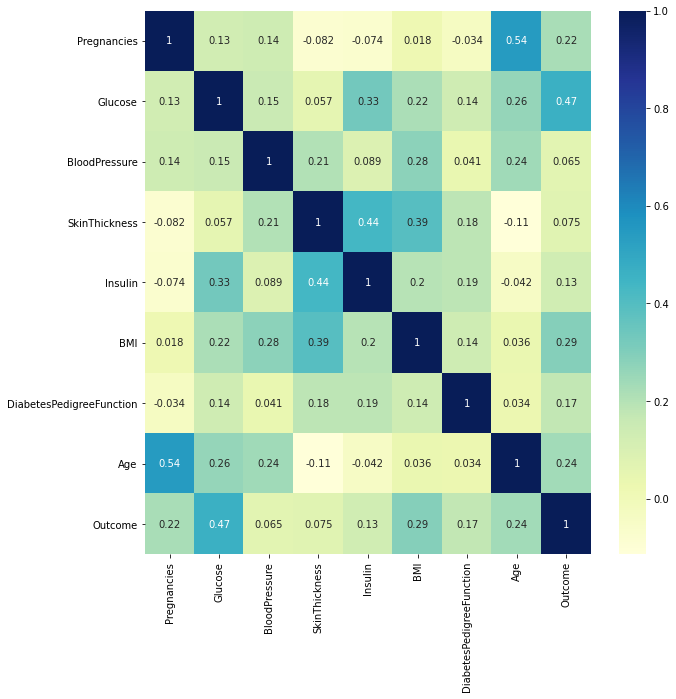

In [3]:
#visualisaton
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot= True,)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


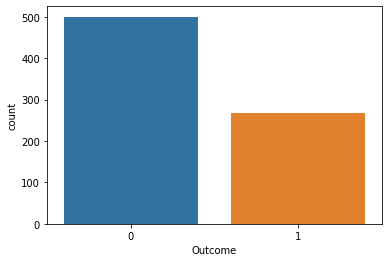

In [4]:
sns.countplot(df['Outcome'],label="Count")

#### Q2. Selection des caracteristiques
Créer les deux dataframes:
- X: le dataframe des entrée (4 colonnes parmit 8) 
- y: la sortie (outcome)

In [5]:
X=df[['Pregnancies','Glucose','BMI','Age']]
y=df[['Outcome']]
X
y.head(10)








,Outcome
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,1
9,1


#### Q3. Partitionner ces données en X_train, X_test, y_train, y_test

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train.head(10)


,Outcome
60,0
618,1
346,0
294,0
231,1
340,0
535,1
306,1
718,0
90,0


#### Q4. Création, entrainement et évaluation du modèle
1. Utiliser le classifieur ***MLPClassifier*** du module ***sklearn.neural_network*** pour initialiser et entrainer trois perceptrons:
- avec une seule couche cachée de 8 neurones
- avec deux couches cachées de (8,16) neurones
- avec trois couches cachées.

2. Afficher la matrice de confusion de ce modèle
3. Calculer les trois metrics suivante:
>- Accuracy
>- Prcison
>- recall
>- F1 score

de ce modèle (voir l'article suivant: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
mlp1 = MLPClassifier(hidden_layer_sizes = (8,),max_iter=800).fit(X_train,y_train)
y_pred1 = mlp1.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred1)
print(cm1)
print(classification_report(y_test,y_pred1))


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[99  0]
 [55  0]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
mlp2 = MLPClassifier(hidden_layer_sizes = (8,16),max_iter=800).fit(X_train,y_train)
y_pred2 = mlp2.predict(X_test)
cm2 = confusion_matrix(y_test,y_pred2)
print(cm2)
print(classification_report(y_test,y_pred2))


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[97  2]
 [40 15]]
              precision    recall  f1-score   support

           0       0.71      0.98      0.82        99
           1       0.88      0.27      0.42        55

    accuracy                           0.73       154
   macro avg       0.80      0.63      0.62       154
weighted avg       0.77      0.73      0.68       154



In [23]:
mlp3 = MLPClassifier(hidden_layer_sizes = (8,16,8),max_iter=800).fit(X_train,y_train)y_pred3 = mlp3.predict(X_test)
cm3 = confusion_matrix(y_test,y_pred3)
print(cm3)
print(classification_report(y_test,y_pred3))


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[87 12]
 [26 29]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        99
           1       0.71      0.53      0.60        55

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**on remarque que plus il y a de couches cachées, plus la score,precision est grande**

#### Q5. utilisation du modèle

Mr Rachid a fait un bilon et a obtenu les resu Après un bilon Mr

    Age: 22
    Glucose: 79
    BloodPressure: 69
    Insulin: 31
    BMI: 0.4

Mr Rachid a-t-il un diabéte?
Comparer le résultat avec celui obtenu avec un arbre de décision.


Documentation
https://towardsdatascience.com/visualizing-the-mlp-a-composition-of-transformations-dec1c62d4eea

In [30]:
#model with 1 hidden layer
Rachid={"Age": [22],"Glucose": [79],"BMI": [0.4],'Pregnancies':[0]}

patient=pd.DataFrame(Rachid)
y_pred1 = mlp1.predict(patient)

print(y_pred1)






[0]


In [29]:
#model with 2 hidden layer
patient=pd.DataFrame(Rachid)
y_pred2 = mlp2.predict(patient)

print(y_pred2)


[0]


In [28]:
#model with 3 hidden layer
patient=pd.DataFrame(Rachid)
y_pred3 = mlp3.predict(patient)

print(y_pred3)


[0]


**model preedict 0 donc Rachide n'est pas diabétique**

In [31]:
#0.647 score of descion tree
# 0.82 score of MLP clqssifier
print(0.82-0.647)

0.17299999999999993


**We observe MLP perform better then Descion tree wth With a difference *0.17*** 

### 2. MNIST database
La base de données MNIST (Modified National Institute of Standards and Technology database) de chiffres manuscrits se compose d'un ensemble de 60 000 exemples d'entrainement et d'un ensemble de test de 10 000 exemples. Il s'agit d'un sous-ensemble d'un ensemble plus large disponible auprès du NIST. De plus, les images en noir et blanc du NIST ont été normalisées en taille et centrées pour s'insérer dans un cadre de délimitation de 28x28 pixels.
#### Q1- Refaire les mémes étape pour construire un système de classification des chiffres manuscrits 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import keras
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


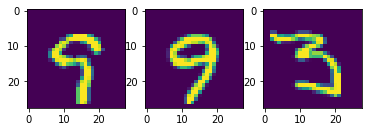

In [5]:
#prenons quelques échantillons a regarder
randindices=np.random.randint(x_train.shape[0],size=3)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(x_train[randindices[0],:,:])
plt.subplot(1,3,2)
plt.imshow(x_train[randindices[1],:,:])
plt.subplot(1,3,3)
plt.imshow(x_train[randindices[2],:,:])

In [6]:
# les equite des échantillons
print(y_train[randindices[0]],y_train[randindices[1]],y_train[randindices[2]])

9 9 3


In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [8]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
x_train.shape


(60000, 784)

In [10]:
y_train.shape

(60000, 10)

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
mlp1= MLPClassifier(activation='relu',hidden_layer_sizes = (8,),max_iter=800).fit(x_train,y_train)

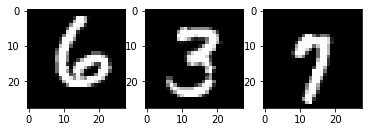

In [13]:
randindices=np.random.randint(x_test.shape[0],size=3)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(np.reshape(x_test[randindices[0],:],(28,28)), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(np.reshape(x_test[randindices[1],:],(28,28)), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(np.reshape(x_test[randindices[2],:],(28,28)), cmap='gray')

In [43]:
predictions1=mlp1.predict(x_test)
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[0],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[0],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[1],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[1],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[2],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[2],:]) * 100) + '%.')

Le réseau reconnaît le chiffre 8 avec une confiance 100%.
Le réseau reconnaît le chiffre 9 avec une confiance 100%.
Le réseau reconnaît le chiffre 6 avec une confiance 100%.


In [45]:
cm = confusion_matrix(y_test.argmax(axis=1), predictions1.argmax(axis=1))
cm
print(classification_report(y_test.argmax(axis=1),predictions1.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.57      0.99      0.72       980
           1       0.98      0.96      0.97      1135
           2       0.94      0.83      0.88      1032
           3       0.94      0.81      0.88      1010
           4       0.92      0.90      0.91       982
           5       0.90      0.81      0.85       892
           6       0.97      0.88      0.92       958
           7       0.96      0.91      0.93      1028
           8       0.92      0.80      0.85       974
           9       0.95      0.88      0.91      1009

    accuracy                           0.88     10000
   macro avg       0.90      0.88      0.88     10000
weighted avg       0.91      0.88      0.89     10000



In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
mlp2 = MLPClassifier(activation='relu',hidden_layer_sizes = (8,16),max_iter=800).fit(x_train,y_train)

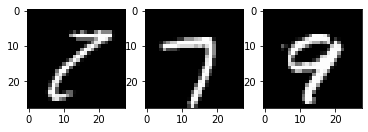

In [16]:
randindices=np.random.randint(x_test.shape[0],size=3)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(np.reshape(x_test[randindices[0],:],(28,28)), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(np.reshape(x_test[randindices[1],:],(28,28)), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(np.reshape(x_test[randindices[2],:],(28,28)), cmap='gray')

In [41]:
predictions2=mlp2.predict(x_test)
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[0],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[0],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[1],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[1],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[2],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[2],:]) * 100) + '%.')

Le réseau reconnaît le chiffre 8 avec une confiance 100%.
Le réseau reconnaît le chiffre 9 avec une confiance 100%.
Le réseau reconnaît le chiffre 6 avec une confiance 100%.


In [42]:
cm = confusion_matrix(y_test.argmax(axis=1), predictions2.argmax(axis=1))
cm
print(classification_report(y_test.argmax(axis=1),predictions2.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       980
           1       0.97      0.97      0.97      1135
           2       0.96      0.89      0.92      1032
           3       0.94      0.88      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.91      0.88      0.89       892
           6       0.96      0.94      0.95       958
           7       0.95      0.91      0.93      1028
           8       0.94      0.88      0.91       974
           9       0.96      0.90      0.93      1009

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
mlp3 = MLPClassifier(activation='relu',hidden_layer_sizes = (8,16,8),max_iter=800).fit(x_train,y_train)

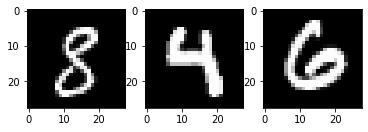

In [19]:
randindices=np.random.randint(x_test.shape[0],size=3)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(np.reshape(x_test[randindices[0],:],(28,28)), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(np.reshape(x_test[randindices[1],:],(28,28)), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(np.reshape(x_test[randindices[2],:],(28,28)), cmap='gray')

In [20]:
predictions=mlp3.predict(x_test)
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[0],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[0],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[1],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[1],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[2],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[2],:]) * 100) + '%.')

Le réseau reconnaît le chiffre 8 avec une confiance 100%.
Le réseau reconnaît le chiffre 9 avec une confiance 100%.
Le réseau reconnaît le chiffre 6 avec une confiance 100%.


In [40]:
cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
cm
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       980
           1       0.98      0.97      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.95      0.92      0.93       982
           5       0.93      0.84      0.89       892
           6       0.96      0.94      0.95       958
           7       0.94      0.93      0.93      1028
           8       0.94      0.89      0.91       974
           9       0.93      0.90      0.92      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## **on remarque que plus il y a de couches cachées, plus la score,precision est grande**

### **We observe MLP perform better then Descion tree ** **bold text**